In [9]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [24]:
data = pd.read_csv(r"C:\Users\Dell\Desktop\DTA_Project\Data-Analysis\StudentPerformanceFactors.csv")
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [25]:
#checking for dublicates 
duplicate_rows = data[data.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


In [27]:
data.drop_duplicates()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [28]:
data["Parental_Involvement"].str.strip("/123...")

0          Low
1          Low
2       Medium
3          Low
4       Medium
         ...  
6602      High
6603      High
6604    Medium
6605      High
6606    Medium
Name: Parental_Involvement, Length: 6607, dtype: object

In [29]:
data["Parental_Involvement"]=data["Parental_Involvement"].str.strip("/123...")

In [31]:
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [32]:
#separating integer columns from string columns 
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
strings_cols = data.select_dtypes(include=['object']).columns

In [33]:
#filling the null values 
for col in numeric_cols:
    data[col] = data[col].fillna(data[col].mean())
for col in strings_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [34]:
print(data.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [35]:
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [39]:
data.loc[data.Access_to_Resources == 'Low', "Access_to_Resources"] = 0
data.loc[data.Access_to_Resources == 'Medium', "Access_to_Resources"] = 1
data.loc[data.Access_to_Resources == 'High', "Access_to_Resources"] = 2
data["Access_to_Resources"] = data["Access_to_Resources"].astype('int64')

data.loc[data.Parental_Involvement == 'Low', "Parental_Involvement"] = 0
data.loc[data.Parental_Involvement == 'Medium', "Parental_Involvement"] = 1
data.loc[data.Parental_Involvement == 'High', "Parental_Involvement"] = 2
data["Parental_Involvement"] = data["Parental_Involvement"].astype('int64')

data.loc[data.Extracurricular_Activities == 'No', "Extracurricular_Activities"] = 0
data.loc[data.Extracurricular_Activities == 'Yes', "Extracurricular_Activities"] = 1
data["Extracurricular_Activities"] = data["Extracurricular_Activities"].astype('int64')

data.loc[data.Motivation_Level == 'Low', "Motivation_Level"] = 0
data.loc[data.Motivation_Level == 'Medium', "Motivation_Level"] = 1
data.loc[data.Motivation_Level == 'High', "Motivation_Level"] = 2
data["Motivation_Level"] = data["Motivation_Level"].astype('int64')

data.loc[data.Internet_Access == 'No', "Internet_Access"] = 0
data.loc[data.Internet_Access == 'Yes', "Internet_Access"] = 1
data["Internet_Access"] = data["Internet_Access"].astype('int64')

data.loc[data.Family_Income == 'Low', "Family_Income"] = 0
data.loc[data.Family_Income == 'Medium', "Family_Income"] = 1
data.loc[data.Family_Income == 'High', "Family_Income"] = 2
data["Family_Income"] = data["Family_Income"].astype('int64')

data.loc[data.Teacher_Quality == 'Low', "Teacher_Quality"] = 0
data.loc[data.Teacher_Quality == 'Medium', "Teacher_Quality"] = 1
data.loc[data.Teacher_Quality == 'High', "Teacher_Quality"] = 2
data["Teacher_Quality"] = data["Teacher_Quality"].astype('int64')

data.loc[data.School_Type == 'Public', "School_Type"] = 0
data.loc[data.School_Type == 'Private', "School_Type"] = 1
data["School_Type"] = data["School_Type"].astype('int64')

data.loc[data.Peer_Influence == 'Negative', "Peer_Influence"] = 0
data.loc[data.Peer_Influence == 'Neutral', "Peer_Influence"] = 1
data.loc[data.Peer_Influence == 'Positive', "Peer_Influence"] = 2
data["Peer_Influence"] = data["Peer_Influence"].astype('int64')

data.loc[data.Learning_Disabilities == 'No', "Learning_Disabilities"] = 0
data.loc[data.Learning_Disabilities == 'Yes', "Learning_Disabilities"] = 1
data["Learning_Disabilities"] = data["Learning_Disabilities"].astype('int64')

data.loc[data.Parental_Education_Level == 'High School', "Parental_Education_Level"] = 0
data.loc[data.Parental_Education_Level == 'College', "Parental_Education_Level"] = 1
data.loc[data.Parental_Education_Level == 'Postgraduate', "Parental_Education_Level"] = 2
data["Parental_Education_Level"] = data["Parental_Education_Level"].astype('int64')

data.loc[data.Distance_from_Home == 'Near', "Distance_from_Home"] = 0
data.loc[data.Distance_from_Home == 'Moderate', "Distance_from_Home"] = 1
data.loc[data.Distance_from_Home == 'Far', "Distance_from_Home"] = 2
data["Distance_from_Home"] = data["Distance_from_Home"].astype('int64')

data.loc[data.Gender == 'Male', "Gender"] = 0
data.loc[data.Gender == 'Female', "Gender"] = 1
data["Gender"] = data["Gender"].astype('int64')

data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,0,7,73,0,1,0,0,1,0,2,3,0,0,0,0,67
1,19,64,0,1,0,8,59,0,1,2,1,1,0,0,4,0,1,1,1,61
2,24,98,1,1,1,7,91,1,1,2,1,1,0,1,4,0,2,0,0,74
3,29,89,0,1,1,8,98,1,1,1,1,1,0,0,4,0,0,1,0,71
4,19,92,1,1,1,6,65,1,1,3,1,2,0,1,4,0,1,0,1,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2,1,0,7,76,1,1,1,2,1,0,2,2,0,0,0,1,68
6603,23,76,2,1,0,8,81,1,1,3,0,2,0,2,2,0,0,0,1,69
6604,20,90,1,0,1,6,65,0,1,3,0,1,0,0,2,0,2,0,1,68
6605,10,86,2,2,1,6,91,2,1,2,0,1,1,2,3,0,0,2,1,68


In [40]:
array = data.values
X = array[:, 0:19]
Y = array[:, 19:]

validation_size = 0.20
seed = 5
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [41]:
X

array([[23, 84,  0, ...,  0,  0,  0],
       [19, 64,  0, ...,  1,  1,  1],
       [24, 98,  1, ...,  2,  0,  0],
       ...,
       [20, 90,  1, ...,  2,  0,  1],
       [10, 86,  2, ...,  0,  2,  1],
       [15, 67,  1, ...,  2,  0,  0]])

In [42]:
Y

array([[67],
       [61],
       [74],
       ...,
       [68],
       [68],
       [64]])

In [43]:
seed = 5
scoring = 'accuracy'

In [45]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# print(models)
# evaluate each model in turn
results = []
names = []
for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

LR: 0.137179 (0.007782)
LDA: 0.854495 (0.007427)


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was pas

KNN: 0.209076 (0.016382)
CART: 0.213238 (0.015126)
NB: 0.061505 (0.023748)


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed w

SVM: 0.187314 (0.016265)


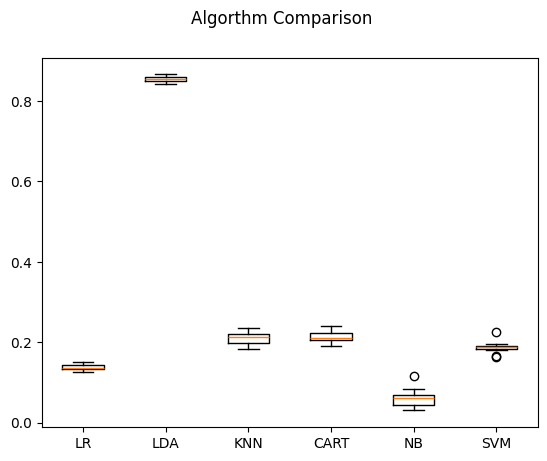

In [46]:
fig = plt.figure()
fig.suptitle('Algorthm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [47]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
predictions = LDA.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print("\t=============================================\n")
print(confusion_matrix(Y_validation, predictions))
print("\t=============================================\n")
print(classification_report(Y_validation, predictions))

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8729198184568835

[[  4   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   9   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1  16   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   2  34   3   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   2  51   8   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   2  57   4   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   3  85   6   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   3 110   7   0   0   0   0   0   0   0   0   0
   

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(res